# Cleaning The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress, ttest_ind

# Study data files
data_path = "cleaned_data.csv"
data_path2 = "Credit liabilities of households (x 1,000,000).csv"

# Read the data
data_original = pd.read_csv(data_path, index_col=0, encoding='utf-8')
data_original2 = pd.read_csv(data_path2, index_col=0, encoding='utf-8')
# Drop any NaN values
data_original2.dropna()

,17-Jan,17-Feb,17-Mar,17-Apr,17-May,17-Jun,17-Jul,17-Aug,17-Sep,17-Oct,...,21-Apr,21-May,21-Jun,21-Jul,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,22-Jan
Credit liabilities of households,,,,,,,,,,,,,,,,,,,,,
Non-mortgage loans,"665,649","666,749","671,427","673,563","678,442","681,794","684,897","686,400","687,870","687,942",...,"688,259","690,663","693,224","692,884","696,565","700,344","699,978","706,596","703,511","697,906"
Chartered banks 1,"476,367","474,825","476,715","477,940","481,525","484,670","486,449","485,896","486,294","486,193",...,"482,084","484,222","487,551","486,650","488,542","491,154","491,342","498,517","496,040","491,212"
Personal loans 1 2,"99,003","99,034","99,318","99,749","100,418","101,108","101,992","101,952","102,308","103,017",...,"115,259","115,462","116,026","116,245","116,837","117,381","117,247","117,606","116,721","116,535"
Of which: Auto loans 1 2,"76,900","76,675","76,891","77,435","78,163","79,143","79,368","80,178","80,792","81,343",...,"90,681","90,911","91,542","91,917","92,298","92,252","92,487","92,430","92,183","91,848"
Credit cards 1 2,"81,281","79,461","79,261","80,357","81,754","82,662","82,606","82,557","83,243","82,763",...,"74,249","75,221","76,422","77,223","78,335","79,324","79,197","82,801","82,102","78,493"
Lines of credit 1 2 4,"245,450","245,606","247,179","247,313","248,888","250,453","251,214","250,607","250,240","249,902",...,"221,278","221,201","221,335","220,681","220,872","221,479","221,780","222,729","222,896","221,793"
"Lines of credit, of which: excluding home equity lines of credit 1 2","70,662","71,001","71,440","71,322","71,799","72,174","71,890","71,621","71,424","71,543",...,"63,350","62,921","62,921","62,908","63,073","63,514","63,560","63,962","64,229","64,222"
Other personal loans 1 2,"19,751","20,023","20,218","20,341","20,702","21,138","21,301","21,558","21,338","21,172",...,"30,390","30,930","31,755","30,647","30,564","30,895","30,837","32,292","31,256","31,461"
Unincorporated business 1 2,"30,882","30,701","30,739","30,180","29,763","29,309","29,336","29,222","29,165","29,339",...,"40,908","41,408","42,013","41,854","41,934","42,075","42,281","43,089","43,065","42,930"


In [2]:
#transpose data
data_original2

,17-Jan,17-Feb,17-Mar,17-Apr,17-May,17-Jun,17-Jul,17-Aug,17-Sep,17-Oct,...,21-Apr,21-May,21-Jun,21-Jul,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,22-Jan
Credit liabilities of households,,,,,,,,,,,,,,,,,,,,,
Non-mortgage loans,"665,649","666,749","671,427","673,563","678,442","681,794","684,897","686,400","687,870","687,942",...,"688,259","690,663","693,224","692,884","696,565","700,344","699,978","706,596","703,511","697,906"
Chartered banks 1,"476,367","474,825","476,715","477,940","481,525","484,670","486,449","485,896","486,294","486,193",...,"482,084","484,222","487,551","486,650","488,542","491,154","491,342","498,517","496,040","491,212"
Personal loans 1 2,"99,003","99,034","99,318","99,749","100,418","101,108","101,992","101,952","102,308","103,017",...,"115,259","115,462","116,026","116,245","116,837","117,381","117,247","117,606","116,721","116,535"
Of which: Auto loans 1 2,"76,900","76,675","76,891","77,435","78,163","79,143","79,368","80,178","80,792","81,343",...,"90,681","90,911","91,542","91,917","92,298","92,252","92,487","92,430","92,183","91,848"
Credit cards 1 2,"81,281","79,461","79,261","80,357","81,754","82,662","82,606","82,557","83,243","82,763",...,"74,249","75,221","76,422","77,223","78,335","79,324","79,197","82,801","82,102","78,493"
Lines of credit 1 2 4,"245,450","245,606","247,179","247,313","248,888","250,453","251,214","250,607","250,240","249,902",...,"221,278","221,201","221,335","220,681","220,872","221,479","221,780","222,729","222,896","221,793"
"Lines of credit, of which: excluding home equity lines of credit 1 2","70,662","71,001","71,440","71,322","71,799","72,174","71,890","71,621","71,424","71,543",...,"63,350","62,921","62,921","62,908","63,073","63,514","63,560","63,962","64,229","64,222"
Other personal loans 1 2,"19,751","20,023","20,218","20,341","20,702","21,138","21,301","21,558","21,338","21,172",...,"30,390","30,930","31,755","30,647","30,564","30,895","30,837","32,292","31,256","31,461"
Unincorporated business 1 2,"30,882","30,701","30,739","30,180","29,763","29,309","29,336","29,222","29,165","29,339",...,"40,908","41,408","42,013","41,854","41,934","42,075","42,281","43,089","43,065","42,930"


In [3]:
data_original2 = data_original2.replace(',', '', regex=True)
data_original2 = data_original2.astype(int)
data_original2.dtypes

17-Jan    int64
17-Feb    int64
17-Mar    int64
17-Apr    int64
17-May    int64
          ...  
21-Sep    int64
21-Oct    int64
21-Nov    int64
21-Dec    int64
22-Jan    int64
Length: 61, dtype: object

In [4]:
#transpose data so that provinces are the index
data_original = data_original.transpose()
data_original.head()


Category,Compensation of employees,Net mixed income,Property income received,Less: property income paid,Current transfers received,Less: current transfers paid,Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Adjusted household disposable income,...,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Social transfers in kind (STiK),Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Household actual final consumption,Change in pension entitlements,Household net saving
Canada_2017,"42,795","7,637","8,113","2,415","12,877","21,283","4,062","6,467","2,493","60,747",...,"3,471","4,342","2,529","13,022","4,062","6,467","2,493","61,541","1,755",961
Canada_2018,"44,683","7,788","8,053","2,795","13,300","22,261","4,186","6,605","2,625","62,185",...,"3,831","4,111","2,631","13,416","4,186","6,605","2,625","63,599","1,722",308
Canada_2019,"45,929","8,175","8,552","3,137","13,603","22,800","4,248","6,797","2,706","64,072",...,"3,947","4,198","2,718","13,750","4,248","6,797","2,706","64,875","1,866","1,062"
Canada_2020,"45,087","8,083","8,278","2,831","18,281","22,780","4,406","7,234","2,767","68,525",...,"2,691","4,274","2,471","14,407","4,406","7,234","2,767","62,304","1,521","7,742"
Canada_2021,"48,642","8,357","8,304","2,574","17,022","24,186","4,408","8,084","2,761","70,818",...,"3,114","4,550","2,640","15,253","4,408","8,084","2,761","66,320","1,602","6,100"


In [5]:
#rename specified column for easier referencing
data_original = data_original.rename(columns={'Household net saving': 'Household_net_saving'})
data_original.head()

Category,Compensation of employees,Net mixed income,Property income received,Less: property income paid,Current transfers received,Less: current transfers paid,Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Adjusted household disposable income,...,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Social transfers in kind (STiK),Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Household actual final consumption,Change in pension entitlements,Household_net_saving
Canada_2017,"42,795","7,637","8,113","2,415","12,877","21,283","4,062","6,467","2,493","60,747",...,"3,471","4,342","2,529","13,022","4,062","6,467","2,493","61,541","1,755",961
Canada_2018,"44,683","7,788","8,053","2,795","13,300","22,261","4,186","6,605","2,625","62,185",...,"3,831","4,111","2,631","13,416","4,186","6,605","2,625","63,599","1,722",308
Canada_2019,"45,929","8,175","8,552","3,137","13,603","22,800","4,248","6,797","2,706","64,072",...,"3,947","4,198","2,718","13,750","4,248","6,797","2,706","64,875","1,866","1,062"
Canada_2020,"45,087","8,083","8,278","2,831","18,281","22,780","4,406","7,234","2,767","68,525",...,"2,691","4,274","2,471","14,407","4,406","7,234","2,767","62,304","1,521","7,742"
Canada_2021,"48,642","8,357","8,304","2,574","17,022","24,186","4,408","8,084","2,761","70,818",...,"3,114","4,550","2,640","15,253","4,408","8,084","2,761","66,320","1,602","6,100"


In [6]:
#remove comas from object
data_original = data_original.replace(',', '', regex=True)
data_original

Category,Compensation of employees,Net mixed income,Property income received,Less: property income paid,Current transfers received,Less: current transfers paid,Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Adjusted household disposable income,...,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Social transfers in kind (STiK),Social transfers in kind (STiK): education,Social transfers in kind (STiK): health,Social transfers in kind (STiK): other,Household actual final consumption,Change in pension entitlements,Household_net_saving
Canada_2017,42795,7637,8113,2415,12877,21283,4062,6467,2493,60747,...,3471,4342,2529,13022,4062,6467,2493,61541,1755,961
Canada_2018,44683,7788,8053,2795,13300,22261,4186,6605,2625,62185,...,3831,4111,2631,13416,4186,6605,2625,63599,1722,308
Canada_2019,45929,8175,8552,3137,13603,22800,4248,6797,2706,64072,...,3947,4198,2718,13750,4248,6797,2706,64875,1866,1062
Canada_2020,45087,8083,8278,2831,18281,22780,4406,7234,2767,68525,...,2691,4274,2471,14407,4406,7234,2767,62304,1521,7742
Canada_2021,48642,8357,8304,2574,17022,24186,4408,8084,2761,70818,...,3114,4550,2640,15253,4408,8084,2761,66320,1602,6100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nunavut_2018,60515,8313,4732,755,17570,30459,11635,25918,15159,112621,...,2363,1140,2097,52711,11635,25918,15159,96511,5286,21396
Nunavut_2019,62355,8752,4832,925,18146,32848,11823,28037,16481,116640,...,2474,1183,2192,56341,11823,28037,16481,101879,6426,21187
Nunavut_2020,64248,8707,5053,851,26859,34039,12674,31156,18663,132470,...,1707,1307,2153,62493,12674,31156,18663,109955,5904,28419
Nunavut_2021,66770,8343,4969,673,24017,35404,12640,30114,17981,128757,...,1849,1293,2148,60735,12640,30114,17981,107188,6159,27729


# Comparing Household Net Savings Between Canadian Provinces from 2017-2021

In [7]:
#create a dataframe for household net saving and convert objects into integers
house_save = pd.DataFrame(data_original[['Household_net_saving']])

house_save['Household_net_saving'] = house_save['Household_net_saving'].astype(int)

house_save.dtypes

Category
Household_net_saving    int64
dtype: object

In [8]:
#create dataframes for each province and confirm they are indeed dataframes
nl_df = house_save.loc[["Newfoundland and Labrador_2017","Newfoundland and Labrador_2018",
                   "Newfoundland and Labrador_2019","Newfoundland and Labrador_2020",
                   "Newfoundland and Labrador_2021",
                       "Newfoundland and Labrador_2022"]]

#double check to see if this is a dataframe 
if type(nl_df) == pd.DataFrame:
    print("DataFrame: Yes")
else:
    print("DataFrame: No")

DataFrame: Yes


In [9]:
#rinse and repeat
can_df = house_save.loc[["Canada_2017","Canada_2018",
                   "Canada_2019","Canada_2020",
                   "Canada_2021",
                        "Canada_2022"]]

nt_df = house_save.loc[["Northwest Territories_2017","Northwest Territories_2018",
                   "Northwest Territories_2019","Northwest Territories_2020",
                   "Northwest Territories_2021",
                       "Northwest Territories_2022"]]

pei_df = house_save.loc[["Prince Edward Island_2017","Prince Edward Island_2018",
                   "Prince Edward Island_2019","Prince Edward Island_2020",
                   "Prince Edward Island_2021",
                        "Prince Edward Island_2022"]]

ns_df = house_save.loc[["Nova Scotia_2017","Nova Scotia_2018",
                   "Nova Scotia_2019","Nova Scotia_2020",
                   "Nova Scotia_2021",
                       "Nova Scotia_2022"]]

nb_df = house_save.loc[["New Brunswick_2017","New Brunswick_2018",
                   "New Brunswick_2019","New Brunswick_2020",
                   "New Brunswick_2021",
                       "New Brunswick_2022"]]

qc_df = house_save.loc[["Quebec_2017","Quebec_2018",
                   "Quebec_2019","Quebec_2020",
                   "Quebec_2021",
                    "Quebec_2022"]]

on_df = house_save.loc[["Ontario_2017","Ontario_2018",
                   "Ontario_2019","Ontario_2020",
                   "Ontario_2021",
                       "Ontario_2022"]]

ma_df = house_save.loc[["Manitoba_2017","Manitoba_2018",
                   "Manitoba_2019","Manitoba_2020",
                   "Manitoba_2021",
                       "Manitoba_2022"]]

sa_df = house_save.loc[["Saskatchewan_2017","Saskatchewan_2018",
                   "Saskatchewan_2019","Saskatchewan_2020",
                   "Saskatchewan_2021",
                       "Saskatchewan_2022"]]

al_df = house_save.loc[["Alberta_2017","Alberta_2018",
                   "Alberta_2019","Alberta_2020",
                   "Alberta_2021",
                       "Alberta_2022"]]

bc_df = house_save.loc[["British Columbia_2017","British Columbia_2018",
                   "British Columbia_2019","British Columbia_2020",
                   "British Columbia_2021",
                       "British Columbia_2022"]]

yu_df = house_save.loc[["Yukon_2017","Yukon_2018",
                   "Yukon_2019","Yukon_2020",
                   "Yukon_2021",
                       "Yukon_2022"]]
nu_df = house_save.loc[["Nunavut_2017","Nunavut_2018",
                   "Nunavut_2019","Nunavut_2020",
                   "Nunavut_2021",
                       "Nunavut_2022"]]

In [10]:
#define years and provinces 
years = [2017,2018,2019,2020,2021,2022]
province0 = "Canada"
province1 = "Newfoundland and Labrador"
province2 = "Prince Edward Island"
province3 = "Nova Scotia"
province4 = "New Brunswick"
province5 = "Quebec"
province6 = "Ontario"
province7 = "Manitoba"
province8 = "Saskatchewan"
province9 = "Alberta"
province10 = "British Columbia"
province11 = "Yukon"
province12 = "Northwest Territories"
province13 = "Nunavut"

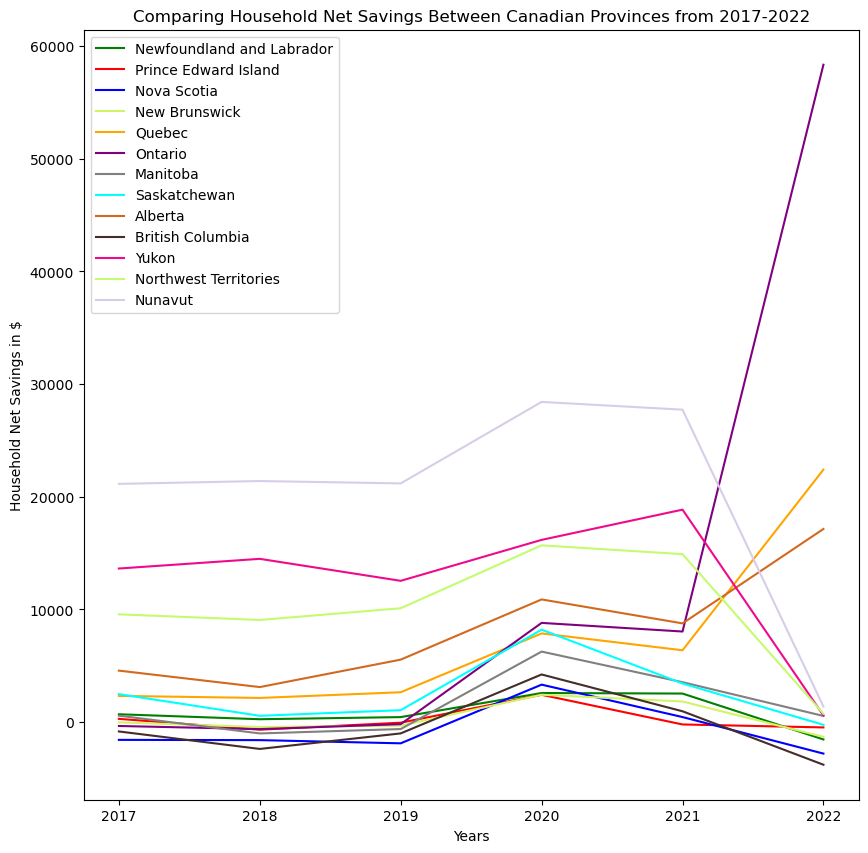

In [28]:
#plot all provinces to see a canadian overview

#plt.plot(years, can_df, color="Red", label=province0)
plt.figure(figsize=(10,10))
plt.plot(years, nl_df, color="green", label=province1)
plt.plot(years, pei_df, color="red", label=province2)
plt.plot(years, ns_df, color="blue", label=province3)
plt.plot(years, nb_df, color="#d3f367", label=province4)
plt.plot(years, qc_df, color="orange", label=province5)
plt.plot(years, on_df, color="purple", label=province6)
plt.plot(years, ma_df, color="grey", label=province7)
plt.plot(years, sa_df, color="cyan", label=province8)
plt.plot(years, al_df, color="chocolate", label=province9)
plt.plot(years, bc_df, color="#452d28", label=province10)
plt.plot(years, yu_df, color="#ef0a8c", label=province11)
plt.plot(years, nt_df, color="#c4fb6f", label=province12)
plt.plot(years, nu_df, color="#d8cde8", label=province13)


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="upper left")

plt.title("Comparing Household Net Savings Between Canadian Provinces from 2017-2022")
plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("Household Net Savings in $")
plt.show()

# Analysis

This graph illustrates a comparison between household net savings between Canadian provinces between the range of 2017 to 2022. As shown in the graph, it is clear that across Canada, net savings are low except for a few provinces; Ontario, Quebec, and Alberta. An interesting observation is the bump in net savings in 2020, likely due to federal Covid-19 stimulus checks. 

# Comparing Household Net Savings to Emplyee Income Across All Canadian Provinces from 2017-2021

In [12]:
#remove rows for Canada to prevent skewing
exclude = ["Canada_2017","Canada_2018","Canada_2019","Canada_2020","Canada_2021","Canada_2022"]
data_original = data_original.drop(exclude)

#compare household income to household savings 
income_save = data_original[['Compensation of employees', 'Household_net_saving']]
income_save = income_save.astype(int)
income_save.head()

Category,Compensation of employees,Household_net_saving
Newfoundland and Labrador_2017,41985,703
Newfoundland and Labrador_2018,41970,261
Newfoundland and Labrador_2019,41615,450
Newfoundland and Labrador_2020,39108,2587
Newfoundland and Labrador_2021,42639,2539


In [13]:
#define the x and y variables to plug into y=mx+b
x = np.array(income_save['Household_net_saving'])
y = np.array(income_save['Compensation of employees'])
# find out the r-value, p-value, std-error
slope, intercept, r_value, p_value, std_err = linregress(x, y)
#print it out
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

Slope: 5.143922167032432
Intercept: 27091.177853403216
R-value: 0.7126269519385613
P-value: 2.524265461966175e-13
Standard error: 0.5808710781370284


Text(0.5, 0, 'Household Net Savings in $')

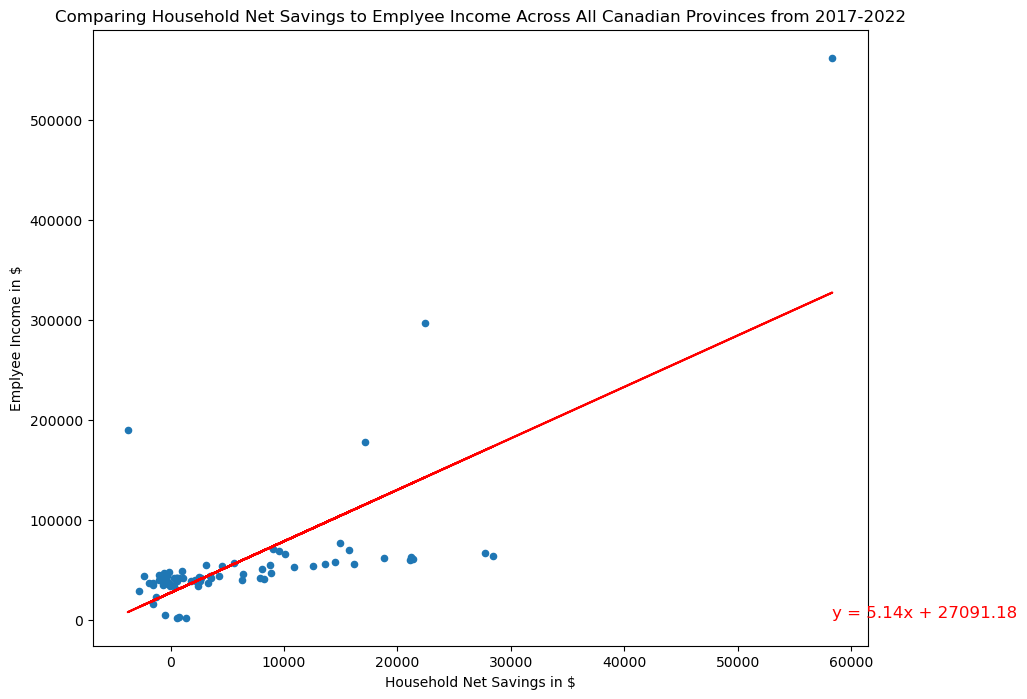

In [14]:
#create a scatter plot from previous notebook cell outputs
income_save.plot(x='Household_net_saving', y='Compensation of employees', kind='scatter', figsize=(10,8))

plt.plot(x, slope * x + intercept, color='red')
#create the y=mx+b line on the graph
equation = f"y = {slope:.2f}x + {intercept:.2f}"

#graph housekeeping 
plt.text(x.max(), y.min(), equation,color='red', fontsize=12)
plt.title("Comparing Household Net Savings to Emplyee Income Across All Canadian Provinces from 2017-2022")
plt.ylabel("Emplyee Income in $")
plt.xlabel("Household Net Savings in $")

# Analysis

This graph illustrates the comparison between household net savings and employee income to see if there is a relationsship between the two. It is clear that as employee income increases, net savings also increases, and this is supported by a P-value of 2.524265461966175e-13, a very small number nearly at zero. The graph line of best fit alligned better with the data points before the 2022 statistic data was released in April due to higher incomes and savings in one specific province: Ontario 2022. After updating the graph with provincial data from 2022, Ontario outliers shifted the graph in the way it appears above. 

# What is the average monthly income of Canadians?

In [15]:
#create dataframes for each province in the correct formatting

nt_df_general = data_original.loc[["Northwest Territories_2017","Northwest Territories_2018",
                   "Northwest Territories_2019","Northwest Territories_2020",
                   "Northwest Territories_2021",
                                  "Northwest Territories_2022"]]

pei_df_general = data_original.loc[["Prince Edward Island_2017","Prince Edward Island_2018",
                   "Prince Edward Island_2019","Prince Edward Island_2020",
                   "Prince Edward Island_2021",
                                   "Prince Edward Island_2022"]]

ns_df_general = data_original.loc[["Nova Scotia_2017","Nova Scotia_2018",
                   "Nova Scotia_2019","Nova Scotia_2020",
                   "Nova Scotia_2021",
                                  "Nova Scotia_2022"]]

nb_df_general = data_original.loc[["New Brunswick_2017","New Brunswick_2018",
                   "New Brunswick_2019","New Brunswick_2020",
                   "New Brunswick_2021",
                                  "New Brunswick_2022"]]

qc_df_general = data_original.loc[["Quebec_2017","Quebec_2018",
                   "Quebec_2019","Quebec_2020",
                   "Quebec_2021",
                                  "Quebec_2022"]]

on_df_general = data_original.loc[["Ontario_2017","Ontario_2018",
                   "Ontario_2019","Ontario_2020",
                   "Ontario_2021",
                                  "Ontario_2022"]]

ma_df_general = data_original.loc[["Manitoba_2017","Manitoba_2018",
                   "Manitoba_2019","Manitoba_2020",
                   "Manitoba_2021",
                                  "Manitoba_2022"]]

sa_df_general = data_original.loc[["Saskatchewan_2017","Saskatchewan_2018",
                   "Saskatchewan_2019","Saskatchewan_2020",
                   "Saskatchewan_2021",
                                  "Saskatchewan_2022"]]

al_df_general = data_original.loc[["Alberta_2017","Alberta_2018",
                   "Alberta_2019","Alberta_2020",
                   "Alberta_2021",
                                  "Alberta_2022"]]

bc_df_general = data_original.loc[["British Columbia_2017","British Columbia_2018",
                   "British Columbia_2019","British Columbia_2020",
                   "British Columbia_2021",
                                  "British Columbia_2022"]]

yu_df_general = data_original.loc[["Yukon_2017","Yukon_2018",
                   "Yukon_2019","Yukon_2020",
                   "Yukon_2021",
                                  "Yukon_2022"]]
nu_df_general = data_original.loc[["Nunavut_2017","Nunavut_2018",
                   "Nunavut_2019","Nunavut_2020",
                   "Nunavut_2021",
                                  "Nunavut_2022"]]
nl_df_general = data_original.loc[["Newfoundland and Labrador_2017","Newfoundland and Labrador_2018",
                   "Newfoundland and Labrador_2019","Newfoundland and Labrador_2020",
                   "Newfoundland and Labrador_2021",
                                  "Newfoundland and Labrador_2022"]]

In [26]:
#finding average monthly income for all provinces

print("The Monthly Provincial Incomes for:")
print("-----------------------------------")
nt_df_general = nt_df_general.astype(int)
nt_sum = nt_df_general["Compensation of employees"].sum()
nt_avg_month_income = (nt_sum /4/12).round(0)
print(f"{province12} is {nt_avg_month_income}$")

pei_df_general = pei_df_general.astype(int)
pei_sum = pei_df_general["Compensation of employees"].sum()
pei_avg_month_income = (pei_sum /4/12).round(0)
print(f"{province2} is {pei_avg_month_income}$")

ns_df_general = ns_df_general.astype(int)
ns_sum = ns_df_general["Compensation of employees"].sum()
ns_avg_month_income = (ns_sum /4/12).round(0)
print(f"{province3} is {nt_avg_month_income}$")

nb_df_general = nb_df_general.astype(int)
nb_sum = nb_df_general["Compensation of employees"].sum()
nb_avg_month_income = (nb_sum /4/12).round(0)
print(f"{province4} is {nb_avg_month_income}$")

qc_df_general = qc_df_general.astype(int)
qc_sum = qc_df_general["Compensation of employees"].sum()
qc_avg_month_income = (qc_sum /4/12).round(0)
print(f"{province5} is {qc_avg_month_income}$")

on_df_general = on_df_general.astype(int)
on_sum = on_df_general["Compensation of employees"].sum()
on_avg_month_income = (on_sum /4/12).round(0)
print(f"{province6} is {on_avg_month_income}$")

ma_df_general = ma_df_general.astype(int)
ma_sum = ma_df_general["Compensation of employees"].sum()
ma_avg_month_income = (ma_sum /4/12).round(0)
print(f"{province7} is {ma_avg_month_income}$")

sa_df_general = sa_df_general.astype(int)
sa_sum = sa_df_general["Compensation of employees"].sum()
sa_avg_month_income = (sa_sum /4/12).round(0)
print(f"{province8} is {sa_avg_month_income}$")

al_df_general = al_df_general.astype(int)
al_sum = al_df_general["Compensation of employees"].sum()
al_avg_month_income = (al_sum /4/12).round(0)
print(f"{province9} is {al_avg_month_income}$")

bc_df_general = bc_df_general.astype(int)
bc_sum = bc_df_general["Compensation of employees"].sum()
bc_avg_month_income = (bc_sum /4/12).round(0)
print(f"{province10} is {bc_avg_month_income}$")

yu_df_general = yu_df_general.astype(int)
yu_sum = yu_df_general["Compensation of employees"].sum()
yu_avg_month_income = (yu_sum /4/12).round(0)
print(f"{province11} is {yu_avg_month_income}$")

nu_df_general = nu_df_general.astype(int)
nu_sum = nt_df_general["Compensation of employees"].sum()
nu_avg_month_income = (nu_sum /4/12).round(0)
print(f"{province13} is {nu_avg_month_income}$")

nl_df_general = nl_df_general.astype(int)
nl_sum = nt_df_general["Compensation of employees"].sum()
nl_avg_month_income = (nl_sum /4/12).round(0)
print(f"{province1} is {nl_avg_month_income}$")

The Monthly Provincial Incomes for:
-----------------------------------
Northwest Territories is 7394.0$
Prince Edward Island is 3730.0$
Nova Scotia is 7394.0$
New Brunswick is 4368.0$
Quebec is 10525.0$
Ontario is 16613.0$
Manitoba is 5069.0$
Saskatchewan is 5123.0$
Alberta is 9384.0$
British Columbia is 8607.0$
Yukon is 5987.0$
Nunavut is 7394.0$
Newfoundland and Labrador is 7394.0$


In [17]:
#create a new dataframe of provinces and there average monthly income
province = ['Northwest Territories', 'Prince Edward Island', 'Nova Scotia','New Brunswick', 
            'Quebec', 'Ontario','Manitoba', 'Saskatchewan',
            'Alberta','British Columbia', 'Yukon', 'Nunavut', 'Newfoundland and Labrador']
average_monthly_income = [nt_avg_month_income, pei_avg_month_income, ns_avg_month_income, nb_avg_month_income, qc_avg_month_income
                         ,on_avg_month_income, ma_avg_month_income, sa_avg_month_income, al_avg_month_income, bc_avg_month_income
                         ,yu_avg_month_income, nu_avg_month_income, nl_avg_month_income]

data = {'Province': province, 'Average Monthly Income in $': average_monthly_income}
prov_avg_month_income_df = pd.DataFrame(data)


Text(0.5, 0, 'Range of Income')

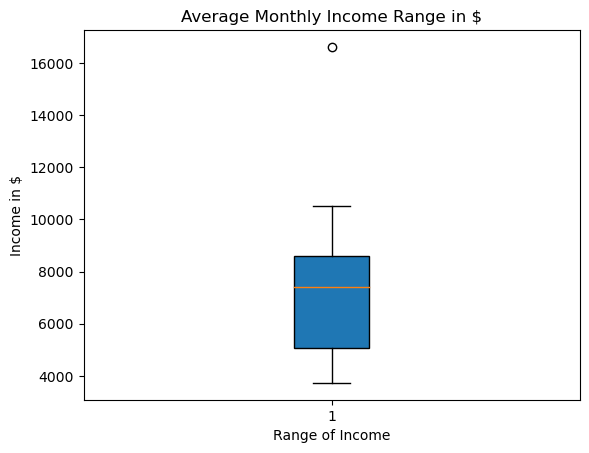

In [21]:
# box and whisker chart portraying the range of monthly incomes

fig, ax = plt.subplots()
ax.boxplot(prov_avg_month_income_df["Average Monthly Income in $"],patch_artist=True)

ax.set_title('Average Monthly Income Range in $')
ax.set_ylabel('Income in $')
ax.set_xlabel('Range of Income')

# Analysis 

The printed text above showes the monthly average incomes per provinces, and it showes the Ontario outlier with 16613.0$ income. The box plot above better describes this list of provincial incomes. The orange line showes the average of all provinces and it corresponds with the Canada average shown in the CSV. At the top of the graph you can see the Ontario outlier.

In [22]:
# Divide dataset by 10 so x and y axis values are readable 
div_data_original2 = data_original2.div(10)

Text(0.5, 0, 'Year')

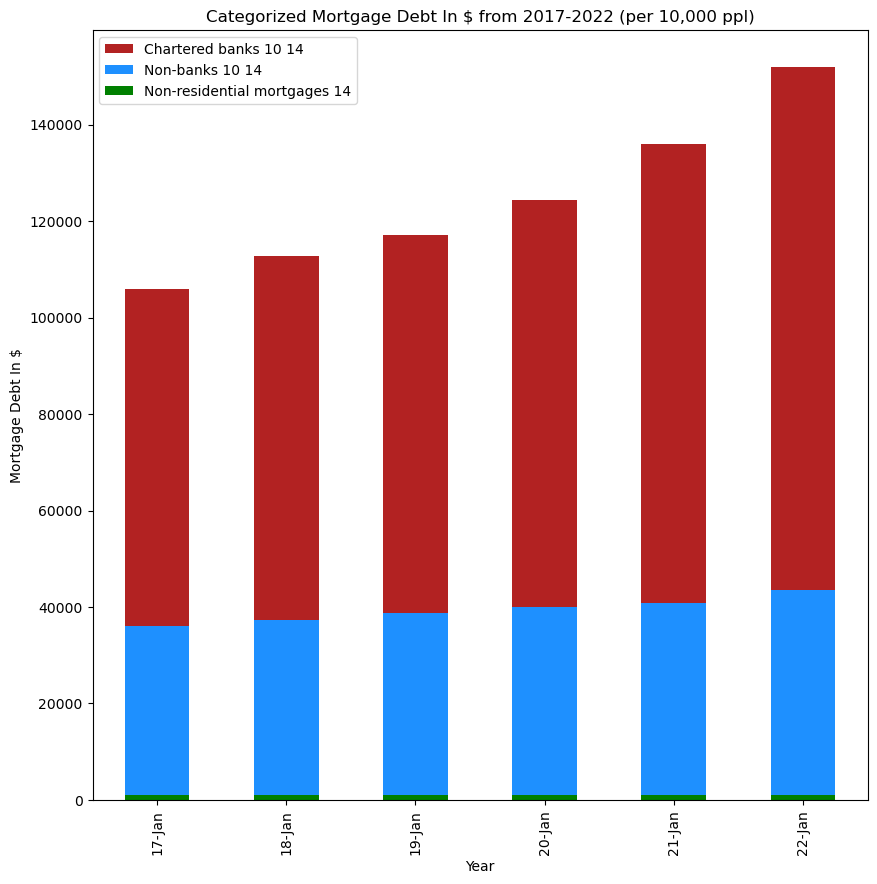

In [20]:
# Assign columsn to values in question 
Debt_1 = "Chartered banks 10 14"
Debt_2 = "Non-banks 10 14"
Debt_3 = "Non-residential mortgages 14"

non_res_mort =div_data_original2.loc[Debt_3, ["17-Jan","18-Jan","19-Jan","20-Jan","21-Jan","22-Jan"]]
non_banks =div_data_original2.loc[Debt_2, ["17-Jan","18-Jan","19-Jan","20-Jan","21-Jan","22-Jan"]]
Chartered_banks =div_data_original2.loc[Debt_1, ["17-Jan","18-Jan","19-Jan","20-Jan","21-Jan","22-Jan"]]

# Define x-axis years 
years = [2017,2018,2019,2020,2021,2022]

# Create plots for all three categories 
Chartered_banks.plot(kind='bar',color='firebrick', figsize=(10,10))
non_banks.plot(kind='bar',color='dodgerblue',figsize=(10,10))
non_res_mort.plot(kind='bar',color='green',figsize=(10,10))

# Housekeeping 
plt.legend()
plt.title("Categorized Mortgage Debt In $ from 2017-2022 (per 10,000 ppl)")
plt.ylabel("Mortgage Debt In $")
plt.xlabel("Year")

# Analysis 

This graph depicts a stacked bar chart categorized by mortgage debt loaners; chartered banks, non-banks. and non-residential mortgages. It is clear that chartered banks take on the majority of mortgage loans with non-banks coming in second. It is not clear based on the data what exactly a non-bank loaner is categorized but from research it may be credit unions and monoline lenders. 

It is clear that Canadians are taking on massive amounts of mortgage debt when comparing this graph to previous ones shown for Canadian household net incomes.